In [1]:
!pip install git+https://github.com/jsh9/python-plot-utilities

  Cloning https://github.com/jsh9/python-plot-utilities to c:\users\ttalp\appdata\local\temp\pip-req-build-envzjfq_
  Created wheel for plot-utils: filename=plot_utils-0.6.6-py3-none-any.whl size=13278151 sha256=323f65b5b4f812d403f13a1c78ad1aebf5cf7f977b9c533e8fa07903c7767099
  Stored in directory: C:\Users\ttalp\AppData\Local\Temp\pip-ephem-wheel-cache-5827khn5\wheels\6d\3f\b7\ac663da9fc0566bd2bfdbbcf98dee2f8f601abaf483b6106b9
Successfully built plot-utils


In [2]:
from brian2 import *
import sympy
import plot_utils

INFO       Cache size for target "cython": 1171 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "C:\Users\01joja\.cython\brian_extensions" directory. [brian2]


In [1]:
def neuron_define(input_neurons):
    input_layer=[*range(0,input_neurons)]
    inhib_layer=[*range(input_neurons,2*input_neurons)]
    left_layer=[*range(2*input_neurons,3*input_neurons-1)]
    right_layer=[*range(3*input_neurons-1,4*input_neurons-2)]
    left_neuron=[4*input_neurons-2]
    right_neuron=[4*input_neurons-1]
    no_excitatory_neurons= len(input_layer+left_layer+right_layer+left_neuron+right_neuron)
    no_inhibitory_neurons= len(inhib_layer)
    return input_layer, inhib_layer, left_layer, right_layer, left_neuron, right_neuron, no_excitatory_neurons, no_inhibitory_neurons

def synapse_generator(input_neurons):
    i = [] #pre synaptic
    j = [] #post synaptic
    a = neuron_define(input_neurons)
    for index in a[0]:
        #connect the layer between input layer and the inhib layer, a[1] is inhib layer.
        i.append(a[0][index])
        j.append(a[1][index])
        if index != a[0][0]:
            #connect the layer between input layer and the left layer, a[2] is left layer.
            i.append(a[0][index])
            j.append(a[2][index-1])
            #connect the layer between inhib layer and the right layer.
            i.append(a[1][index])
            j.append(a[3][index-1])
        #connect the layer between input layer and the right layer, a[3] is right layer.
        if index != a[0][-1]:
            i.append(a[0][index])
            j.append(a[3][index])
            #connect the layer between inhib layer and the left layer.
            i.append(a[1][index])
            j.append(a[2][index])
            #connect the left layer to the left neuron
            i.append(a[2][index])
            j.append(a[4][0])
            #connect the right layer to the right neuron
            i.append(a[3][index])
            j.append(a[5][0])
        
    return i,j,a[6],a[7]

def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1) 
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

In [35]:
# %%
from random import random, randrange


def spikegen(N: int, end_time: int, star_time: int =  0, random_start: bool = False):
  delta_time = (end_time - star_time)
  # Initialize a direction list
  labels = [None] * delta_time
  spikes = [None] * delta_time
  times = [None] * delta_time

  if random_start:
    start_place = randrange(0, N)
  else:
    start_place = round(N/2)

  # Set first spike manually
  labels[0] = 0
  spikes[0] = start_place
  times[0] = 0
  
  t = 1
  id = start_place
  cooldown = 0
  target = id
  dir = 0

  while t < delta_time:
    # Get a target
    if id == target:
      while id == target:
        target = randrange(0, N)
      dir = round((target - id) / abs(target - id))
      #print(dir)

    # Check whether to move to stand still
    still = True
    if cooldown == 0:
      # 10% chance of standing still
      if randrange(0, 20) == 0:
        cooldown = 3
      else:
        still = False
    else:
      cooldown -= 1

    d = 0 if still == True else dir
    # Do movement
    id += d

    # Set output data
    labels[t] = d
    spikes[t] = id
    times[t] = t

    #print('t: {:1d}\tid: {:1d}\td: {:1d}\ttarget: {:1d}'.format(t, id, d, target), end='\n')
    t += 1

  return {
    'labels': labels,
    'spikes': spikes,
    'times': times
  }


def filter_spikes(data):
  ## Removes zeros so it dose not spike on them.
  z = list(zip(*[data[k] for k in data]))
  f = [r for r in z if r[0] != 0]
  v = [list(t) for t in zip(*f)]

  o = dict()
  for i, k in enumerate(data):
    o[k] = v[i]
  return o

l = list(zip(data['labels'], data['spikes'], data['times']))

print(data['labels'])
print(data['spikes'])
print(data['times'])
#print(l)




[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 64, 63, 62, 63, 64, 65, 66, 67, 68, 68, 68, 68, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 79, 79, 79, 79, 80, 81, 82, 81, 80, 79, 78, 77, 76, 75, 74, 74, 74, 74, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 53, 53, 53, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 40, 40, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65

In [68]:
input_neurons = 100 ### insert no of input neurons here ###
time = 20

data = spikegen(input_neurons, time)
data_without_zeros = filter_spikes(data)

print(data_without_zeros)

{'labels': [1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1], 'spikes': [51, 52, 53, 54, 55, 56, 57, 58, 57, 56, 55, 54, 53, 52], 'times': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]}


In [90]:
#https://brian2.readthedocs.io/en/stable/examples/frompapers.Stimberg_et_al_2018.example_1_COBA.html
start_scope()

seed(11922)  # to get identical figures for repeated runs

################################################################################
# Model parameters
################################################################################
### General parameters

labels = data_without_zeros['labels']
spikes = data_without_zeros['spikes']
time_for_spikes = data_without_zeros['times']*ms

duration = time*ms    # Total simulation time
sim_dt = 0.01*ms        # Integrator/sampling step


### Neuron parameters
tau_m = 30*ms         # Excitatory synaptic time constant
V_th = 50e-3         # Firing threshold
V_r = 35e-3          # Reset potential       
R = 90e6




### Synapse parameters
we = 1          # Excitatory synaptic weight
wi = -1           # Inhibitory synaptic weight

#indices = [3,4,5,6,5,4,3,3,4,5,6,5,4,3] #np.linspace(0, 50, num=2)
#times = [10,11,12,13,14,15,16,30,31,32,33,34,35,36]*ms #np.linspace(10, 90, num=2)*ms




################################################################################
# Model definition
################################################################################
# Set the integration time (in this case not strictly necessary, since we are
# using the default value)
defaultclock.dt = sim_dt

### Neurons
neuron_eqs = '''
dv/dt = ((V_r-v)+R*I)/tau_m : 1
I : 1
'''
input_group = NeuronGroup(input_neurons, model=neuron_eqs,threshold='v>V_th', reset='v=V_r', method='euler')

neurons = NeuronGroup(3*input_neurons-2, model=neuron_eqs,threshold='v>V_th', reset='v=V_r', method='euler')

left = NeuronGroup(1, model=neuron_eqs,threshold='v>V_th',reset='v=V_r', method='euler')

right = NeuronGroup(1, model=neuron_eqs,threshold='v>V_th',reset='v=V_r', method='euler')

neurons.I  = 50e-12
neurons.v = input_group.v = left.v = right.v = 'V_r'

input_layer = SpikeGeneratorGroup(input_neurons, spikes, time_for_spikes, dt=sim_dt) # assigs 1/4 of the neurons to the input layer
#input_layer = input_group[:input_neurons]
inh_neurons = neurons[:input_neurons] # assigs 1/4 of the neurons to the inhibitory layer
left_layer  = neurons[1*input_neurons:2*input_neurons-1] # assigs 1/4 -1 of the neurons to the left exitatory layer
right_layer = neurons[2*input_neurons-1:3*input_neurons-2] # assigs 1/4 -1 of the neurons to the right exitatory layer
left_neuron = left[0] # assigns 1 of the neurons to the final left layer
right_neuron= right[0] # assigns 1 of the neurons to the final right layer

### Synapses
exc_syn = Synapses(input_layer, inh_neurons, model = 'w : 1', on_pre = 'v += w') # Connects the input layer to the inhibitory layer
exc_syn_left = Synapses(input_layer, left_layer, model = 'w : 1', on_pre = 'v += w') # Connects the input layer to the left exitatory layer
exc_syn_right = Synapses(input_layer, right_layer, model = 'w :1', on_pre = 'v += w') # Connects the input layer to the right exitatory layer
inh_syn_right = Synapses(inh_neurons, right_layer, model = 'w : 1', on_pre = 'v += w') # Connects the inhibitory layer to the right exitatory layer
inh_syn_left = Synapses(inh_neurons, left_layer, model = 'w : 1', on_pre = 'v += w') # Connects the inhibitory layer to the left exitatory layer
final_left = Synapses(left_layer, left_neuron, model = 'w : 1', on_pre = 'v += w') # Connects the left exitatory layer to the final left neuron
final_right = Synapses(right_layer, right_neuron, model = 'w : 1', on_pre = 'v += w') # Connects the right exitatory layer to the final right neuron

exc_syn.connect(i=[*range(0,input_neurons)],j=[*range(0,input_neurons)])
exc_syn_left.connect(i=[*range(1,input_neurons)],j=[*range(0,input_neurons-1)])
exc_syn_right.connect(i=[*range(0,input_neurons-1)],j=[*range(0,input_neurons-1)])
inh_syn_right.connect(i=[*range(1,input_neurons)],j=[*range(0,input_neurons-1)])
inh_syn_left.connect(i=[*range(0,input_neurons-1)],j=[*range(0,input_neurons-1)])
final_left.connect(i=[*range(0,input_neurons-1)],j=0)
final_right.connect(i=[*range(0,input_neurons-1)],j=0)

exc_syn.w = 60e-3
exc_syn_left.w = 60e-3
exc_syn_right.w = 60e-3
inh_syn_right.w = -100e-3
inh_syn_left.w = -100e-3
final_left.w = 60e-3
final_right.w = 60e-3


#visualise_connectivity(exc_syn)
#visualise_connectivity(exc_syn_left)
#visualise_connectivity(exc_syn_right)
#visualise_connectivity(inh_syn_left)
#visualise_connectivity(inh_syn_right)
#visualise_connectivity(final_left)
#visualise_connectivity(final_right)


# ##############################################################################
# # Monitors
# ##############################################################################
# Note that we could use a single monitor for all neurons instead, but in this
# way plotting is a bit easier in the end
#exc_mon = SpikeMonitor(input_layer)
#inh_mon = SpikeMonitor(inh_neurons)

### We record some additional data from a single excitatory neuron

left_monitor = StateMonitor(left_neuron, 'v', record=0)
left_event = EventMonitor(left, event='spike', variables='v')
right_monitor = StateMonitor(right_neuron, 'v', record=0)
right_event = EventMonitor(right, event='spike', variables='v')
#L_right = StateMonitor(inh_neurons, 'v', record=0)

print('Halfway there')

run(duration, report='text')



Halfway there
Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Starting simulation at t=20. ms for a duration of 40. ms
40. ms (100%) simulated in < 1s


In [ ]:
def network_guess(left_spikes,right_spikes):
    

(<eventmonitor_1.i: array([0, 0, 0, 0, 0, 0, 0])>, <eventmonitor_1.t: array([ 5.02, 13.02, 14.02, 15.02, 16.02, 17.02, 18.02]) * msecond>)
(<eventmonitor_2.i: array([0, 0, 0, 0, 0, 0, 0, 0])>, <eventmonitor_2.t: array([ 5.02,  6.02,  7.02,  8.02,  9.02, 10.02, 11.02, 12.02]) * msecond>)
[1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1]


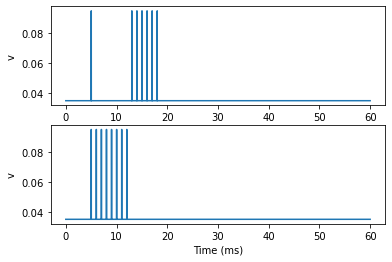

In [102]:

figure()
subplot(211)
plot(left_monitor.t/ms, left_monitor.v[0])
xlabel('Time (ms)')
ylabel('v');
subplot(212)
plot(right_monitor.t/ms, right_monitor.v[0])
xlabel('Time (ms)')
ylabel('v');

print(left_event.it[0][])
print(right_event.it)
print(labels)

<eventmonitor_1.i: array([0, 0, 0, 0, 0, 0, 0])>
<class 'brian2.core.variables.VariableView'>
(<eventmonitor_2.i: array([0, 0, 0, 0, 0, 0, 0, 0])>, <eventmonitor_2.t: array([ 5.02,  6.02,  7.02,  8.02,  9.02, 10.02, 11.02, 12.02]) * msecond>)
[1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1]


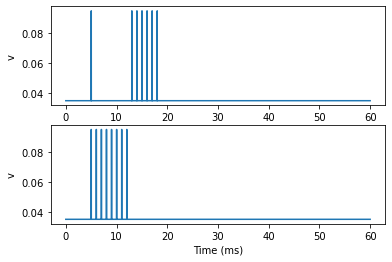

In [105]:

figure()
subplot(211)
plot(left_monitor.t/ms, left_monitor.v[0])
xlabel('Time (ms)')
ylabel('v');
subplot(212)
plot(right_monitor.t/ms, right_monitor.v[0])
xlabel('Time (ms)')
ylabel('v');

print(left_event.it[0])
print(type(left_event.it[0]))
print(right_event.it)
print(labels)

In [5]:
print(neurons)

NeuronGroup(clock=Clock(dt=10. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_1')


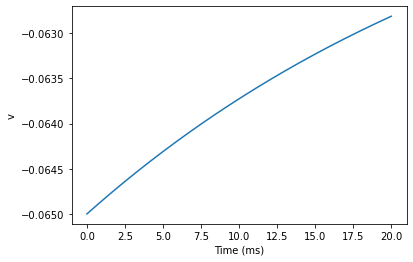

In [6]:


plot(L_right.t/ms, L_right.v[0])
xlabel('Time (ms)')
ylabel('v');
